# Massive tree workflow

This tutorial how to create a massive tree of actors, here doing a simple operation:
summing integers in the range [0, 2^(n+1)]. Just change the power parameter to make
the tree more complex.

This workflow works reasonably for power up to ~15.

In [1]:
from wowp.actors import FuncActor
from wowp.schedulers import ThreadedScheduler
from wowp.components import draw_graph

%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [2]:
# How many branching will be there:
power = 8

In [3]:
# Basic building blocks
def add(a, b) -> ('a'):
    return a + b

leaves = []

def split(act, depth):
    global leaves
    if depth == 0:
        leaves.append(act)
    else:
        child1 = FuncActor(add)
        child2 = FuncActor(add)
        child1.outports.a.connect(act.inports.a)
        child2.outports.a.connect(act.inports.b)
        split(child1, depth-1)
        split(child2, depth-1)

In [4]:
# Create the actor
last = FuncActor(add)
split(last, power)

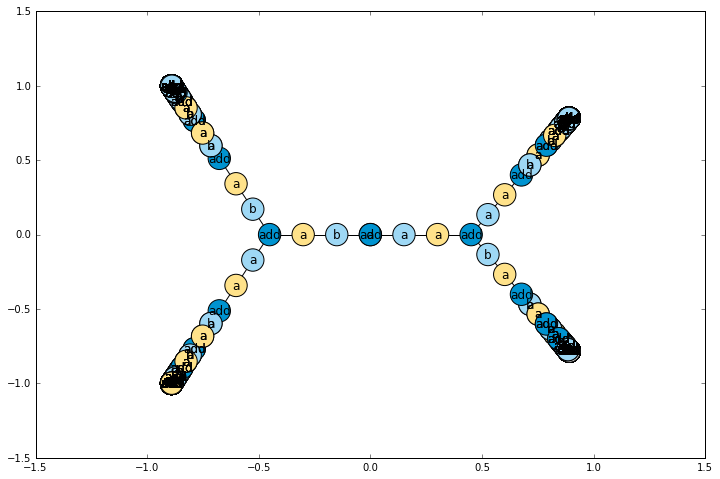

In [5]:
# Let's draw the graph of actors
graph = last.graph
plt.subplots(figsize=(12, 8))
draw_graph(graph)

In [6]:
# from wowp.tools.plotting import ipy_show (old style)
# ipy_show(last)

In [7]:
# We have 64 inports, let's sum number 1..64

# (in threads)
scheduler = ThreadedScheduler(max_threads=8)

for i, actor in enumerate(leaves):
    scheduler.put_value(actor.inports.a, i * 2 + 1)
    scheduler.put_value(actor.inports.b, i * 2 + 2)

scheduler.execute()
print("Result: ", last.outports.a.pop())

Result:  131328


In [8]:
# Check the result (obtained in a somewhat ;-) better way)
sum(range(1, 2 * 2**power + 1))

131328